In [5]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn import linear_model

length = 7530

f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(length):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append([int.from_bytes(left, byteorder = 'little' ,signed = True)])
  right_lst.append([int.from_bytes(right, byteorder = 'little' ,signed = True)])
  pan_lst.append([int.from_bytes(pan, byteorder = 'little' ,signed = True)])
  tilt_lst.append([int.from_bytes(tilt, byteorder = 'little' ,signed = True)])

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(length):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append([int.from_bytes(panoff, byteorder = 'little' ,signed = True)])
  tiltoff_lst.append([int.from_bytes(tiltoff, byteorder = 'little' ,signed = True)])
  rotateoff_lst.append([int.from_bytes(rotateoff, byteorder = 'little' ,signed = True)])
  tranoff_lst.append([int.from_bytes(tranoff, byteorder = 'little' ,signed = True)])

rotatecom = []
translatecom = []
for i in range(length):
  rotatecom.append([(right_lst[i][0] - left_lst[i][0])/2])
  translatecom.append([(right_lst[i][0] + left_lst[i][0])/2])



f_error = open('error', 'rb')
pan_pid = []
tilt_pid = []
rotate_pid = []
tran_pid = []
for i in range(length):
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  pan_pid.append(box)
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  tilt_pid.append(box)
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  rotate_pid.append(box)
  box = []
  m_integral = f_error.read(4)
  m_prevError = f_error.read(4)
  m_nowError = f_error.read(4)
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_integral, byteorder = 'little' ,signed = True))
  box.append(int.from_bytes(m_nowError, byteorder = 'little' ,signed = True) - int.from_bytes( m_prevError, byteorder = 'little' ,signed = True))
  tran_pid.append(box)

f_error_pid = open('pantilt_pid', 'rb')
pan_lst = []
tilt_lst = []
for i in range(length):
  box = []
  pan_com = f_error_pid.read(4)
  box.append(int.from_bytes(pan_com, byteorder = 'little' ,signed = True))
  pan_lst.append(box)

  box = []
  tilt_com = f_error_pid.read(4)
  box.append(int.from_bytes(tilt_com, byteorder = 'little' ,signed = True))
  tilt_lst.append(box)
  

In [30]:
size = 15000
test_num = 1000 
datanum = 3
purpose_offset = tiltoff_lst
purpose_value = tilt_lst
purpose_pid  = tilt_pid

In [31]:


print(purpose_pid)
print(purpose_value)


[[23, 23, 2147483671], [22, 45, -1], [19, 64, -3], [22, 86, 3], [21, 107, -1], [19, 126, -2], [19, 145, 0], [18, 163, -1], [14, 177, -4], [64, 241, 50], [7, 248, -57], [7, 255, 0], [9, 264, 2], [2, 266, -7], [51, 317, 49], [-5, 312, -56], [0, 312, 5], [1, 313, 1], [-6, 307, -7], [-6, 301, 0], [-10, 291, -4], [-18, 273, -8], [-11, 262, 7], [-14, 248, -3], [-17, 231, -3], [-17, 214, 0], [-18, 196, -1], [-16, 180, 2], [-16, 164, 0], [33, 197, 49], [21, 218, -12], [21, 239, 0], [41, 280, 20], [89, 369, 48], [51, 420, -38], [-7, 413, -58], [-15, 398, -8], [-26, 372, -11], [4, 376, 30], [2, 378, -2], [32, 410, 30], [-22, 388, -54], [29, 417, 51], [29, 446, 0], [26, 472, -3], [28, 500, 2], [34, 534, 6], [34, 568, 0], [19, 587, -15], [15, 602, -4], [8, 610, -7], [-3, 607, -11], [-3, 604, 0], [-3, 601, 0], [1, 602, 4], [0, 602, -1], [-5, 597, -5], [-31, 566, -26], [-15, 551, 16], [-15, 536, 0], [-15, 521, 0], [35, 35, 2147483683], [32, 67, -3], [32, 99, 0], [28, 127, -4], [28, 155, 0], [24, 179

In [32]:

print(len(purpose_pid))
mem = []
for i in range(length):
  for j in range(3):
    if purpose_pid[i][j] > 200000:
      print(i,j,":", purpose_pid[i][j])
      purpose_pid[i][2] = 0
      mem.append(i)

# for i in range(len(mem)):
#   del purpose_pid[mem[len(mem) - i - 1]]
#   del purpose_value[mem[len(mem) - i - 1]]


length -= len(mem)

7530
0 2 : 2147483671
61 2 : 2147483683
313 2 : 2147483590
321 2 : 2147483739
332 2 : 2147483698
990 2 : 2147483677
996 2 : 2147483687
1005 2 : 2147483734
1021 2 : 2147483623
1032 2 : 2147483741
1078 2 : 2147483749
1123 2 : 2147483729
1131 2 : 2147483705
1343 2 : 2147483547
1435 2 : 2147483577
1572 2 : 2147483625
1697 2 : 2147483718
1790 2 : 2147483709
1816 2 : 2147483700
1934 2 : 2147483691
3626 2 : 2147483718
3640 2 : 2147483635
3653 2 : 2147483607
4173 2 : 2147483695
4192 2 : 2147483733
4208 2 : 2147483592
5133 2 : 2147483688
5699 2 : 2147483549
5701 2 : 2147483726
6710 2 : 2147483584
6717 2 : 2147483743
6719 2 : 2147483710
6844 2 : 2147483695
6866 2 : 2147483650
7451 2 : 2147483709


In [33]:
# from sklearn.preprocessing import MinMaxScaler
# scaler1 = MinMaxScaler().fit(purpose_pid)
# purpose_pid = scaler1.transform(purpose_pid)
# scaler2 = MinMaxScaler().fit(purpose_value)
# purpose_value = scaler2.transform(purpose_value)

In [34]:
# input_lst = []
# for i in range(size - datanum + 1):
#   box=[]
#   for j in range(i, i+datanum, 1):
#     box.append(purpose_offset[j][0])
#   input_lst.append(box)


# label_lst = []
# for i in range(datanum - 1, size, 1):
#   label_lst.append(purpose_value[i])
input_lst = purpose_pid
label_lst = purpose_value

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    purpose_pid, purpose_value, test_size = 0.25, random_state=42)

In [36]:
print(len(X_train))
print(len(X_test))

5647
1883


In [37]:

# X = [[0., 0.], [1., 1.]]
# # y = [0, 1]
# clf = MLPRegressor(hidden_layer_sizes=1)

clf = linear_model.LinearRegression()



In [38]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
clf.predict(X_test)


array([[  3.60575973],
       [-29.87007295],
       [ 11.73780552],
       ...,
       [ -3.51407695],
       [  6.30199431],
       [ -7.01588753]])

In [40]:
# print([coef.shape for coef in clf.coefs_])
# for coef in clf.coefs_:
#   print(coef)
# clf.get_params(deep=True)

In [41]:
# [coef.shape for coef in clf.coefs_]
# for coef in clf.coefs_:
#   print(coef)
# clf.coefs_[0][2][0] = -1*clf.coefs_[0][2][0]
# print(clf.coefs_[0][2])


In [42]:
# clf.coef_[0][2]= 0.81768123
# clf.coef_

In [47]:
# clf.coef_[0][0]= 0.390625

# clf.coef_[0][2]= 0.390625
# clf.coef_

array([[ 5.06648903e-01, -1.51141465e-04,  4.78996157e-01]])

R_square : [0.96607424]


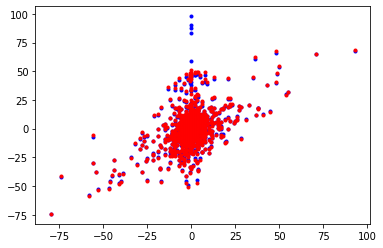

In [44]:
import matplotlib.pyplot as plt

y_hat = clf.predict(X_test)


SSE_lst = 0 
SST_lst = 0

sume = 0
for i in range(len(Y_test)):
  sume = sume + Y_test[i][0]

means = float(sume/len(Y_test))

for i in range(len(Y_test)):
  SSE_lst += (Y_test[i][0] - y_hat[i])**2
  SST_lst += (Y_test[i][0] - means)**2



R_square = 1 - (SSE_lst / SST_lst)

print("R_square :", R_square) 

input_encoded = []
for i in range(len(X_test)):
  input_encoded.append(X_test[i][datanum -1])

plt.plot(input_encoded, Y_test, '.', color = 'b') 
plt.plot(input_encoded, y_hat, '.', color = 'r') 

plt.show()

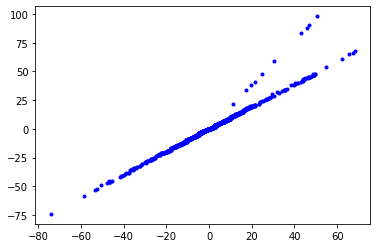

In [45]:
plt.plot(y_hat, Y_test, '.', color = 'b') 

plt.show()

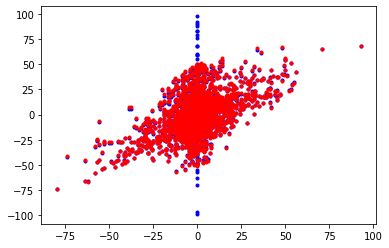

In [46]:
input_encoded = []
for i in range(len(input_lst)):
  input_encoded.append(input_lst[i][datanum -1])
y_hat_2 = clf.predict(input_lst)

plt.plot(input_encoded, label_lst, '.', color = 'b')
plt.plot(input_encoded, y_hat_2, '.', color = 'r')
plt.show()